In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#set stylesheet for figures
sns.set_theme(context='notebook', style='ticks', palette='viridis')

#define where dataset is located, here we are running PCA only on the fluid-related data#
df = pd.read_csv("/home/kiri/Thesis/PCA.csv")
#Print the data set - lets us check we've imported the correct thing#
print(df)

   VAD_type Lumen_number Infusion_Fluid  Input_Velocity  Maximum_velocity  \
0      PIVC       Single        Glucose         0.58360              1.13   
1      PIVC       Single        Glucose         1.75000              3.44   
2      PIVC       Single        Glucose         3.50000              6.89   
3      PIVC       Single        Glucose        17.50000             33.95   
4      PIVC       Single         Saline         0.58360              1.13   
5      PIVC       Single         Saline         1.75000              3.40   
6      PIVC       Single         Saline         3.50000              6.88   
7      PIVC       Single         Saline        17.50000             36.20   
8      PICC       Single        Glucose         0.08000              1.79   
9      PICC       Single        Glucose         0.16000              1.79   
10     PICC       Single        Glucose         0.33000              1.79   
11     PICC       Single        Glucose         0.65000              1.79   

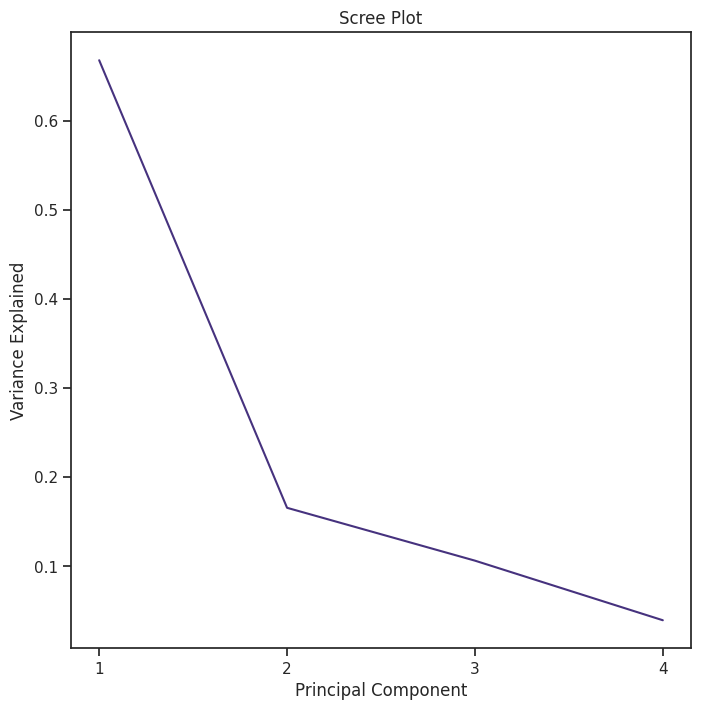

[0.6678398  0.16579303 0.10651305 0.03965499]


<Figure size 640x480 with 0 Axes>

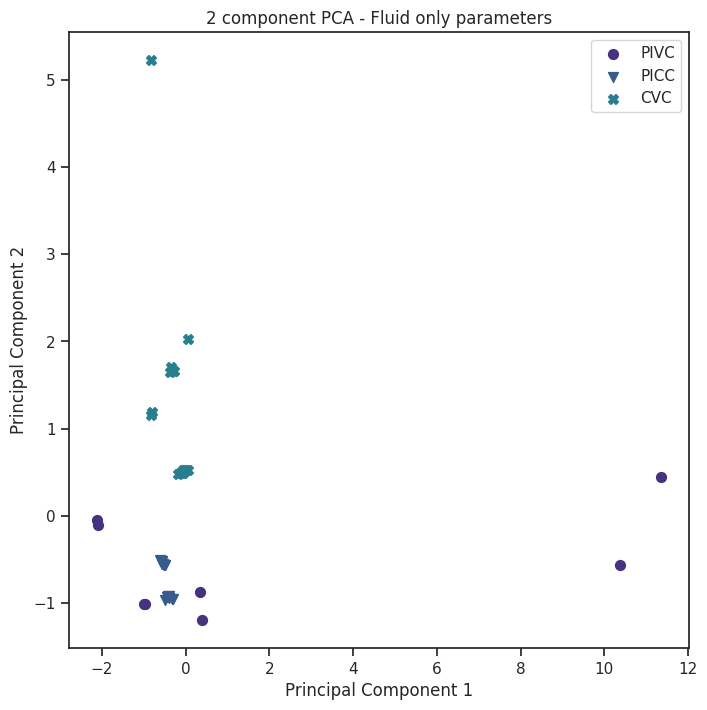

In [13]:
features = ['Input_Velocity' ,'Maximum_velocity', 'Average_velocity', 'Maximum_fluid_shear', 'Average_fluid_shear' ,'Maximum_WSS','Average_WSS', 'Minimum_residencetime']
x = df.loc[:, features].values
y= df.loc[:,['VAD_type','Infusion_Fluid','Lumen_number']].values 

x= StandardScaler().fit_transform(x)
pca = PCA(n_components=4)
principalComponents =pca.fit_transform(x)

principalDf= pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf = pd.concat([principalDf, df[['VAD_type','Lumen_number','Infusion_Fluid']]], axis = 1)

#Create the Scree Plot and calculate amount of variance explained by each principal component#
PC_values = np.arange(pca.n_components_) + 1
fig = plt.figure(figsize=(8, 8))
plt.plot(PC_values, pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(PC_values)
plt.ylabel('Variance Explained')
plt.show()

#Automatically save the plot this generates - matplotlib currently running a non-GUI backend so cannot visualise the plot#
matplotlib.pyplot.savefig('screeplot_fluid.png')

#How much variance is explained by X number of principal components?#
print(pca.explained_variance_ratio_)
#the result of this is printed in the terminal - from this, we know that two PC are more than adequate to represent this data set.#

#Plot PCA - show first two components#
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA - Fluid only parameters')

#Set different markers for each type of VAD#
targets = ['PIVC', 'PICC', 'CVC']
marker = ['o', 'v', 'X']

#loop through each of the 3 VADs and plot the scatter plot#
for target, marker in zip(targets,marker):
    indicesToKeep = finalDf['VAD_type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , marker = marker
               , label=target
               , s=50)
ax.legend(targets) 
matplotlib.pyplot.savefig('PCA_fluid.png')


   VAD_type Lumen_number Infusion_Fluid  Input_Velocity  Maximum_velocity  \
0      PIVC       Single        Glucose         0.58360              1.13   
1      PIVC       Single        Glucose         1.75000              3.44   
2      PIVC       Single        Glucose         3.50000              6.89   
4      PIVC       Single         Saline         0.58360              1.13   
5      PIVC       Single         Saline         1.75000              3.40   
6      PIVC       Single         Saline         3.50000              6.88   
8      PICC       Single        Glucose         0.08000              1.79   
9      PICC       Single        Glucose         0.16000              1.79   
10     PICC       Single        Glucose         0.33000              1.79   
11     PICC       Single        Glucose         0.65000              1.79   
12     PICC       Single         Saline         0.08000              1.79   
13     PICC       Single         Saline         0.16000              1.79   

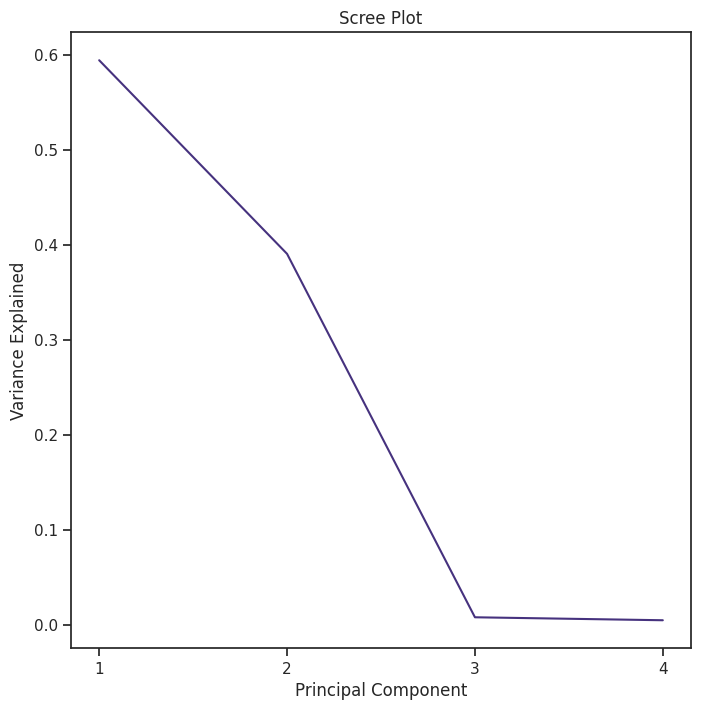

[0.59489879 0.3911099  0.00856046 0.00543085]


<Figure size 640x480 with 0 Axes>

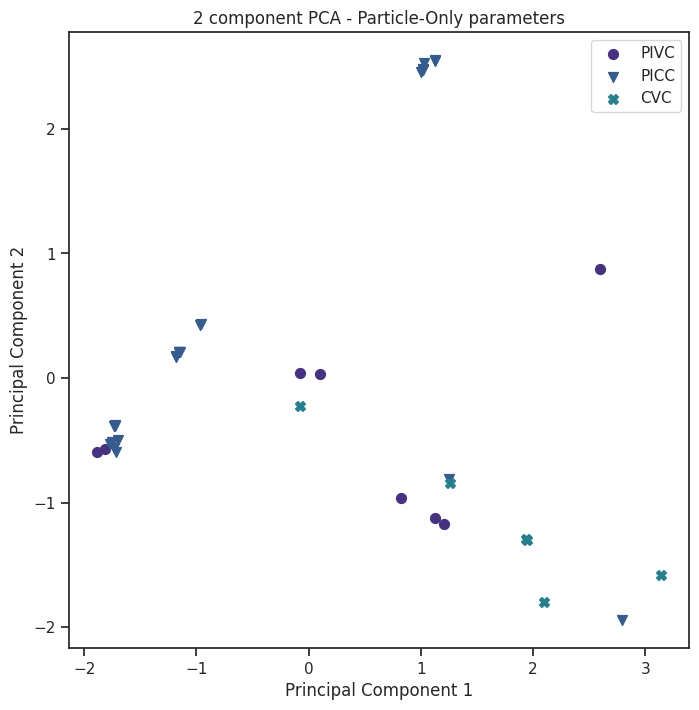

In [14]:
##Here we are running particle-only PCA. 
#define where dataset is located#
df_particles = pd.read_csv("/home/kiri/Thesis/PCA.csv")
#Print the data set - lets us check we've imported the correct thing#
df_particles_cleaned = df_particles.dropna(axis=0, how='any')
print(df_particles_cleaned)

features = ['Maximum_particlevelocity','Average_particlevelocity','Maximum_PSS','Average_PSS']
particles_x = df_particles_cleaned.loc[:, features].values
particles_y= df_particles_cleaned.loc[:,['VAD_type','Infusion_Fluid','Lumen_number']].values 

particles_x= StandardScaler().fit_transform(particles_x)
pca_particles = PCA(n_components=4)
principalComponents_particles =pca.fit_transform(particles_x)

principalDf_particles= pd.DataFrame(data = principalComponents_particles, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf_particles = pd.concat([principalDf_particles, df[['VAD_type','Lumen_number','Infusion_Fluid']]], axis = 1)

#Create the Scree Plot and calculate amount of variance explained by each principal component#
PC_values_particles = np.arange(pca.n_components_) + 1
fig = plt.figure(figsize=(8, 8))
plt.plot(PC_values_particles, pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(PC_values_particles)
plt.ylabel('Variance Explained')
plt.show()

#Automatically save the plot this generates - matplotlib currently running a non-GUI backend so cannot visualise the plot#
matplotlib.pyplot.savefig('screeplot_nanoparticles.png')

#How much variance is explained by X number of principal components?#
print(pca.explained_variance_ratio_)
#the result of this is printed in the terminal - from this, we know that two PC are more than adequate to represent this data set.#

#Plot PCA - show first two components#
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA - Particle-Only parameters')

#Set different markers for each type of VAD#
targets = ['PIVC', 'PICC', 'CVC']
marker = ['o', 'v', 'X']

#loop through each of the 3 VADs and plot the scatter plot#
for target, marker in zip(targets,marker):
    indicesToKeep = finalDf_particles['VAD_type'] == target
    ax.scatter(finalDf_particles.loc[indicesToKeep, 'principal component 1']
               , finalDf_particles.loc[indicesToKeep, 'principal component 2']
               , marker = marker
               , label=target
               , s=50)
ax.legend(targets) 
matplotlib.pyplot.savefig('PCA_nanoparticles.png')

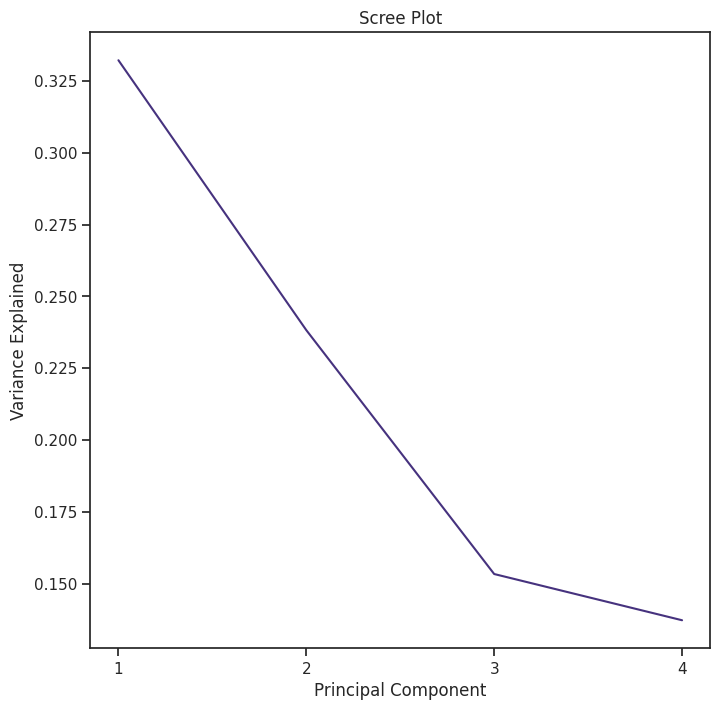

[0.33226649 0.2382598  0.15331858 0.13721796]


<Figure size 640x480 with 0 Axes>

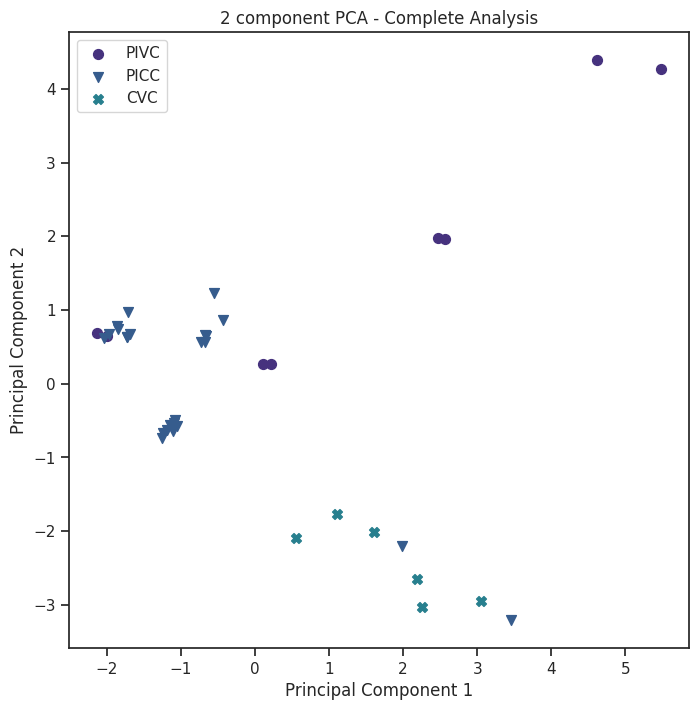

In [17]:
##Here we are running the complete PCA analysis where both particle and fluid behaviour are analysed simultaneously. 
#define where dataset is located#
df_complete = pd.read_csv("/home/kiri/Thesis/PCA.csv")
#Print the data set - lets us check we've imported the correct thing#
df_complete_cleaned = df_complete.dropna(axis=0, how='any')
#print(df_complete_cleaned)

features = ['Input_Velocity' ,'Maximum_velocity', 'Average_velocity', 'Maximum_fluid_shear', 'Average_fluid_shear' ,'Maximum_WSS','Average_WSS','Minimum_residencetime', 'Maximum_particlevelocity','Average_particlevelocity','Maximum_PSS','Average_PSS']
complete_x = df_complete_cleaned.loc[:, features].values
complete_y= df_complete_cleaned.loc[:,['VAD_type','Infusion_Fluid','Lumen_number']].values 

complete_x = StandardScaler().fit_transform(complete_x)
pca_complete = PCA(n_components=4)
principalComponents_complete =pca.fit_transform(complete_x)

principalDf_complete = pd.DataFrame(data = principalComponents_complete, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf_complete = pd.concat([principalDf_complete, df[['VAD_type','Lumen_number','Infusion_Fluid']]], axis = 1)

#Create the Scree Plot and calculate amount of variance explained by each principal component#
PC_values_complete = np.arange(pca.n_components_) + 1
fig = plt.figure(figsize=(8, 8))
plt.plot(PC_values_complete, pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(PC_values_complete)
plt.ylabel('Variance Explained')
plt.show()

#Automatically save the plot this generates - matplotlib currently running a non-GUI backend so cannot visualise the plot#
matplotlib.pyplot.savefig('screeplot_complete.png')

#How much variance is explained by X number of principal components?#
print(pca.explained_variance_ratio_)
#the result of this is printed in the terminal - from this, we know that two PC are more than adequate to represent this data set.#

#Plot PCA - show first two components#
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA - Complete Analysis')

#Set different markers for each type of VAD#
targets = ['PIVC', 'PICC', 'CVC']
marker = ['o', 'v', 'X']

#loop through each of the 3 VADs and plot the scatter plot#
for target, marker in zip(targets,marker):
    indicesToKeep = finalDf_complete['VAD_type'] == target
    ax.scatter(finalDf_complete.loc[indicesToKeep, 'principal component 1']
               , finalDf_complete.loc[indicesToKeep, 'principal component 2']
               , marker = marker
               , label=target
               , s=50)
ax.legend(targets) 
matplotlib.pyplot.savefig('PCA_complete.png')
